In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [255]:
ODAQ_results = pd.read_csv('./ODAQ/ODAQ_listening_test/ODAQ_results.csv')
ODAQ_results_BSU1 = pd.read_csv('./ODAQ_v1_BSU/Cohort_B1_results.csv')
ODAQ_results_BSU2 = pd.read_csv('./ODAQ_v1_BSU/Cohort_B2_results.csv')

In [256]:
methods = ODAQ_results['method'].unique()
conditions = ODAQ_results['condition'].unique()
processes = ODAQ_results['process'].unique()
items = ODAQ_results['item'].unique()

print(methods)
print(conditions)
print(processes)
print(items)

['LP' 'TM' 'UN' 'SH' 'PE' 'DE']
['LP3.5' 'LP7' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Ref']
['LP35' 'LP70' 'LP50' 'LP90' 'LP105' 'LP120' 'LP150' 'reference' 'TM3k'
 'TM5k' 'TM7k' 'TM9k' 'TM10.5k' 'UN3k' 'UN5k' 'UN7k' 'UN9k' 'UN10.5k'
 'SH70_MS' 'SH50_MS' 'SH30_MS' 'SH20_MS' 'SH10_MS' 'PE_4096_MS_NMR10'
 'PE_2048_MS_NMR10' 'PE_1024_MS_NMR10' 'PE_2048_MS_NMR16'
 'PE_1024_MS_NMR16' 'OpenUnmix_mid' 'TFC_TDF_U_Net_mid' 'Cocktail_mid'
 'DeepFilterNet2_mid' 'PSM_quantize_mask']
['LP_11_guitar' 'LP_23_jazz' 'LP_AmateurOnPurpose'
 'LP_CreatureFromTheBlackjackTable' 'TM_01b_trumpet' 'TM_02_violin'
 'TM_AmateurOnPurpose' 'TM_CreatureFromTheBlackjackTable'
 'UN_20c_accordion' 'UN_21_violin' 'UN_AmateurOnPurpose'
 'UN_CreatureFromTheBlackjackTable' 'SH_04_choral' 'SH_13_glockenspiel'
 'SH_AmateurOnPurpose' 'SH_CreatureFromTheBlackjackTable'
 'PE_27_castanets' 'PE_39_clapping' 'PE_AmateurOnPurpose'
 'PE_CreatureFromTheBlackjackTable' 'DE_CosmosLandromat_remix1_LD6'
 'DE_CosmosLandromat_remix3_LD3' 'DE_ElephantsD

In [257]:
# Dynamically create expert variables
unique_subjects = ODAQ_results['subject'].unique()
for i, subject in enumerate(unique_subjects, start=1):
    globals()[f"expert{i}"] = ODAQ_results[ODAQ_results['subject'] == subject]

# Dynamically create BSU1 variables
unique_subjects_BSU1 = ODAQ_results_BSU1['subject'].unique()
for i, subject in enumerate(unique_subjects_BSU1, start=1):
    globals()[f"BSU1_{i}"] = ODAQ_results_BSU1[ODAQ_results_BSU1['subject'] == subject]

# Dynamically create BSU2 variables
unique_subjects_BSU2 = ODAQ_results_BSU2['subject'].unique()
for i, subject in enumerate(unique_subjects_BSU2, start=1):
    globals()[f"BSU2_{i}"] = ODAQ_results_BSU2[ODAQ_results_BSU2['subject'] == subject]
    
print('Experts: ', unique_subjects)
print('BSU1: ', unique_subjects_BSU1)
print('BSU2: ', unique_subjects_BSU2)

Experts:  ['Subject 1: USLA08' 'Subject 2: DEID44' 'Subject 3: DEID1115'
 'Subject 4: DEID337' 'Subject 5: USLA06' 'Subject 6: DEID5'
 'Subject 7: DEID9' 'Subject 8: DEID4' 'Subject 9: USLG04'
 'Subject 10: USLA04' 'Subject 11: USLA07' 'Subject 12: DEID256'
 'Subject 13: DEID6' 'Subject 14: USLG05' 'Subject 15: USLA09'
 'Subject 16: USLG02' 'Subject 17: USLG03' 'Subject 18: DEID7'
 'Subject 19: USLA12' 'Subject 20: DEID10' 'Subject 21: DEID8'
 'Subject 22: DEID2' 'Subject 23: USLA01' 'Subject 24: USLA05'
 'Subject 25: DEID1' 'Subject 26: DEID3']
BSU1:  ['D001' 'D002' 'D003' 'D004' 'D008' 'D009' 'D010' 'D011']
BSU2:  ['D005' 'D013' 'D014' 'D015' 'D016' 'D017' 'D018' 'D019']


In [258]:
# Initialize score lists dynamically for 26 experts
for i in range(1, 27):  # Assuming 26 experts
    globals()[f"expert{i}_scores"] = []

# Initialize score lists dynamically for BSU1
for i in range(1, 9):  # Assuming 26 experts
    globals()[f"BSU1_{i}_scores"] = []

# Initialize score lists dynamically for BSU2
for i in range(1, 9):  # Assuming 26 experts
    globals()[f"BSU2_{i}_scores"] = []

# Append scores systematically
for item in items:
    for i in range(1, 27):
        expert_df = globals()[f"expert{i}"]  # Access expert data frame
        scores = expert_df[expert_df['item'] == item]['score'].values
        globals()[f"expert{i}_scores"].append(scores)

    for i in range(1, 9):
        BSU1_df = globals()[f"BSU1_{i}"]
        scores = BSU1_df[BSU1_df['item'] == item]['score'].values
        globals()[f"BSU1_{i}_scores"].append(scores)

    for i in range(1, 9):
        BSU2_df = globals()[f"BSU2_{i}"]
        scores = BSU2_df[BSU2_df['item'] == item]['score'].values
        globals()[f"BSU2_{i}_scores"].append(scores)
        

In [259]:
# create expert{}_scores_df

# Initialize expert{}_scores_df
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"]['item'] = items
    globals()[f"expert{i}_scores_df"]['score'] = globals()[f"expert{i}_scores"]
    globals()[f"expert{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"] = globals()[f"expert{i}_scores_df"].explode(['score', 'condition'])


# create BSU1_{}_scores_df

# Initialize BSU1_{}_scores_df
for i in range(1, 9):
    globals()[f"BSU1_{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 9):
    globals()[f"BSU1_{i}_scores_df"]['item'] = items
    globals()[f"BSU1_{i}_scores_df"]['score'] = globals()[f"BSU1_{i}_scores"]
    globals()[f"BSU1_{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 9):
    globals()[f"BSU1_{i}_scores_df"] = globals()[f"BSU1_{i}_scores_df"].explode(['score', 'condition'])


# create BSU2_{}_scores_df

# Initialize BSU2_{}_scores_df
for i in range(1, 9):
    globals()[f"BSU2_{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 9):
    globals()[f"BSU2_{i}_scores_df"]['item'] = items
    globals()[f"BSU2_{i}_scores_df"]['score'] = globals()[f"BSU2_{i}_scores"]
    globals()[f"BSU2_{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 9):
    globals()[f"BSU2_{i}_scores_df"] = globals()[f"BSU2_{i}_scores_df"].explode(['score', 'condition'])

# K-Means for Ranking Experts and Students

In [260]:
# K-means clustering for expert scores for ranking

for i in range(1, 27):
    # Dynamically access each expert's DataFrame
    df = globals()[f"expert{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"expert{i}_scores_df"] = df


# K-means clustering for BSU1 scores for ranking

for i in range(1, 9):
    # Dynamically access each expert's DataFrame
    df = globals()[f"BSU1_{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"BSU1_{i}_scores_df"] = df


# K-means clustering for BSU2 scores for ranking

for i in range(1, 9):
    # Dynamically access each expert's DataFrame
    df = globals()[f"BSU2_{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"BSU2_{i}_scores_df"] = df


In [261]:
# Define distinct colors for the 8 clusters
cluster_colors = [
    "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", 
    "#19D3F3", "#FF6692", "#B6E880"
]

# Create a colormap from the cluster colors
cmap = mcolors.ListedColormap(cluster_colors)

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_4598/1551089044.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



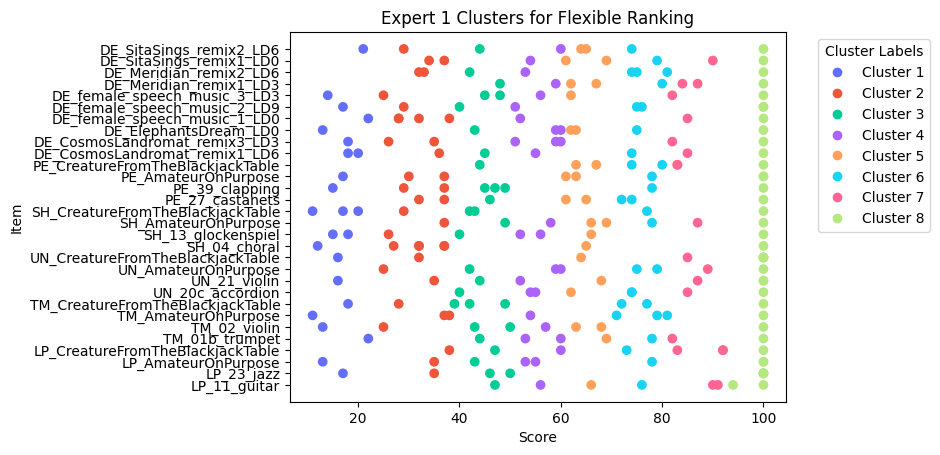

In [262]:
# Visualize the clusters for expert 1

scatter = plt.scatter(expert1_scores_df['score'], 
                      expert1_scores_df['item'], 
                      c=expert1_scores_df['cluster'], 
                      cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 1 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_4598/3972007069.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



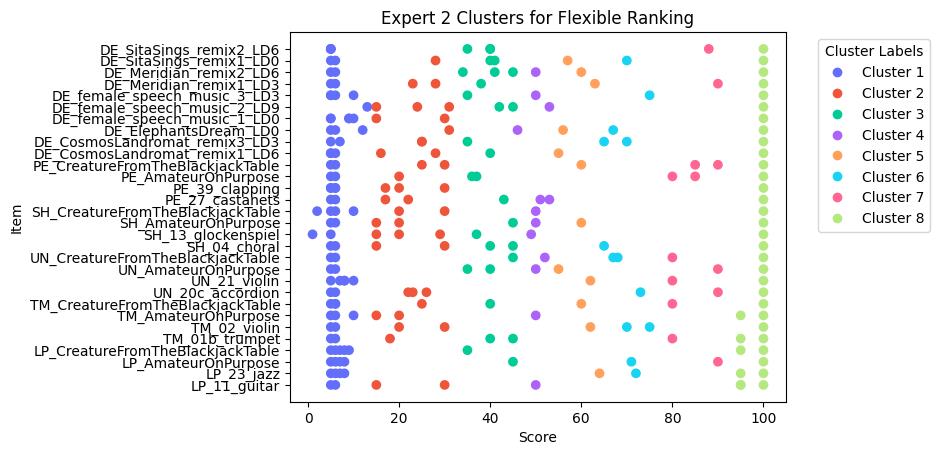

In [263]:
# Visualize the clusters for expert 2

scatter = plt.scatter(expert2_scores_df['score'], 
                       expert2_scores_df['item'], 
                       c=expert2_scores_df['cluster'],
                       cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 2 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_4598/3094881421.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



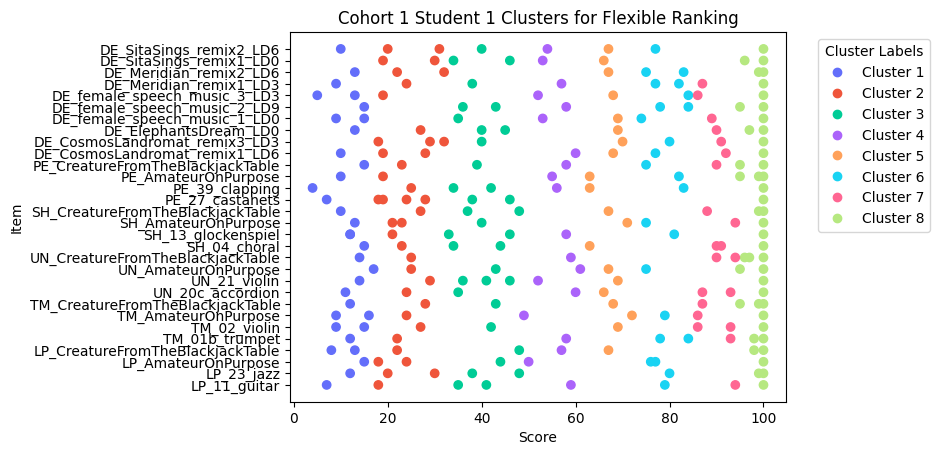

In [264]:
# Visualize the clusters for BSU1_1

scatter = plt.scatter(BSU1_1_scores_df['score'],
                      BSU1_1_scores_df['item'],
                      c=BSU1_1_scores_df['cluster'],
                      cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Cohort 1 Student 1 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0],
                    labels=[f'Cluster {i+1}' for i in range(8)],
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_4598/1279425059.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



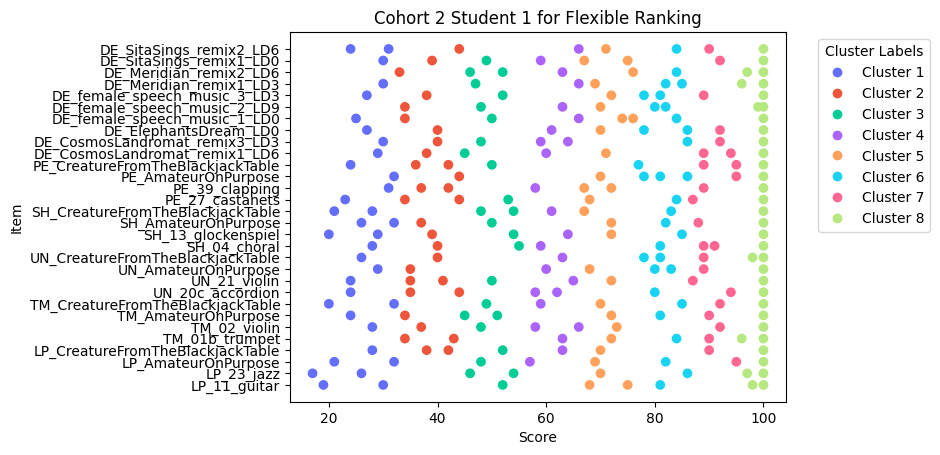

In [265]:
# Visualize the clusters for BSU2_1

scatter = plt.scatter(BSU2_1_scores_df['score'],
                      BSU2_1_scores_df['item'],
                      c=BSU2_1_scores_df['cluster'],
                      cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Cohort 2 Student 1 for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0],
                    labels=[f'Cluster {i+1}' for i in range(8)],
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

In [266]:
# print how many items are in each cluster for each expert

for i in range(1, 2):
    df = globals()[f"expert{i}_scores_df"]
    cluster_counts = df.groupby('cluster')['item'].count()
    print(f"Expert {i} Cluster Counts:")
    print(cluster_counts)
    print("Total Items (should be 240):")
    print(sum(cluster_counts))
    print()

Expert 1 Cluster Counts:
cluster
1    24
2    38
3    31
4    29
5    26
6    31
7    20
8    41
Name: item, dtype: int64
Total Items (should be 240):
240



# Heatmap & Hierarchical Clustering

In [267]:
# Convert back to simple dataframe

for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"expert{i}_scores_df"] = df

for i in range(1, 9):
    df = globals()[f"BSU1_{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"BSU1_{i}_scores_df"] = df

for i in range(1, 9):
    df = globals()[f"BSU2_{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"BSU2_{i}_scores_df"] = df

In [268]:
# Extract all the 'rankings' column value for each expert and create a 30x8 matrix for each expert. Name as expert1_rankings_kmeans_based, expert2_rankings_kmeans_based, etc.

for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"expert{i}_rankings_kmeans_based"] = rankings_matrix

for i in range(1, 9):
    df = globals()[f"BSU1_{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"BSU1_{i}_rankings_kmeans_based"] = rankings_matrix

for i in range(1, 9):
    df = globals()[f"BSU2_{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"BSU2_{i}_rankings_kmeans_based"] = rankings_matrix

In [269]:
# Perfect ranking
perfect_ranking = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [270]:
# Define a distance function (Euclidean distance)
def compute_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)  # Euclidean distance

For $\mathbf{v}_1 = [v_{1,1}, v_{1,2}, \ldots, v_{1,n}]$ and $\mathbf{v}_2 = [v_{2,1}, v_{2,2}, \ldots, v_{2,n}]$, with $n=8$, we compute the euclidean distance between them as follows:
$$d(\mathbf{v}_1, \mathbf{v}_2) = \sqrt{\sum_{i=1}^{n} (v_{1,i} - v_{2,i})^2}$$

In [271]:
# Initialize a 26x30 matrix to store distances
distance_matrix_experts = np.zeros((26, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix_experts[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

distance_matrix_experts_df = pd.DataFrame(distance_matrix_experts, columns=items)

# Increment index by 1 for distance_matrix_df

distance_matrix_experts_df.index += 1

# --------------------------------------------------------------------------------------------------------

# Initialize a 34x30 matrix to store distances for Experts + BSU1
distance_matrix_experts_BSU1 = np.zeros((34, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix_experts_BSU1[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

for i in range(1, 9):  # 8 BSU1 students
    BSU1_rankings = globals()[f"BSU1_{i}_rankings_kmeans_based"]  # Get BSU1 rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per BSU1 student
        distance_matrix_experts_BSU1[26+i-1, j] = compute_distance(BSU1_rankings[j], perfect_ranking)

distance_matrix_experts_BSU1_df = pd.DataFrame(distance_matrix_experts_BSU1, columns=items)

# Increment index by 1 for distance_matrix_experts_BSU1_df
distance_matrix_experts_BSU1_df.index += 1

# --------------------------------------------------------------------------------------------------------

# Initialize a 42x30 matrix to store distances for Experts + BSU1 + BSU2
distance_matrix_experts_BSU1_BSU2 = np.zeros((42, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix_experts_BSU1_BSU2[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

for i in range(1, 9):  # 8 BSU1 students
    BSU1_rankings = globals()[f"BSU1_{i}_rankings_kmeans_based"]  # Get BSU1 rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per BSU1 student
        distance_matrix_experts_BSU1_BSU2[26+i-1, j] = compute_distance(BSU1_rankings[j], perfect_ranking)

for i in range(1, 9):  # 8 BSU2 students
    BSU2_rankings = globals()[f"BSU2_{i}_rankings_kmeans_based"]  # Get BSU2 rankings (30 vectors)

    for j in range(30):  # 30 ranking vectors per BSU2 student
        distance_matrix_experts_BSU1_BSU2[34+i-1, j] = compute_distance(BSU2_rankings[j], perfect_ranking)

distance_matrix_experts_BSU1_BSU2_df = pd.DataFrame(distance_matrix_experts_BSU1_BSU2, columns=items)

# Increment index by 1 for distance_matrix_experts_BSU1_BSU2_df
distance_matrix_experts_BSU1_BSU2_df.index += 1

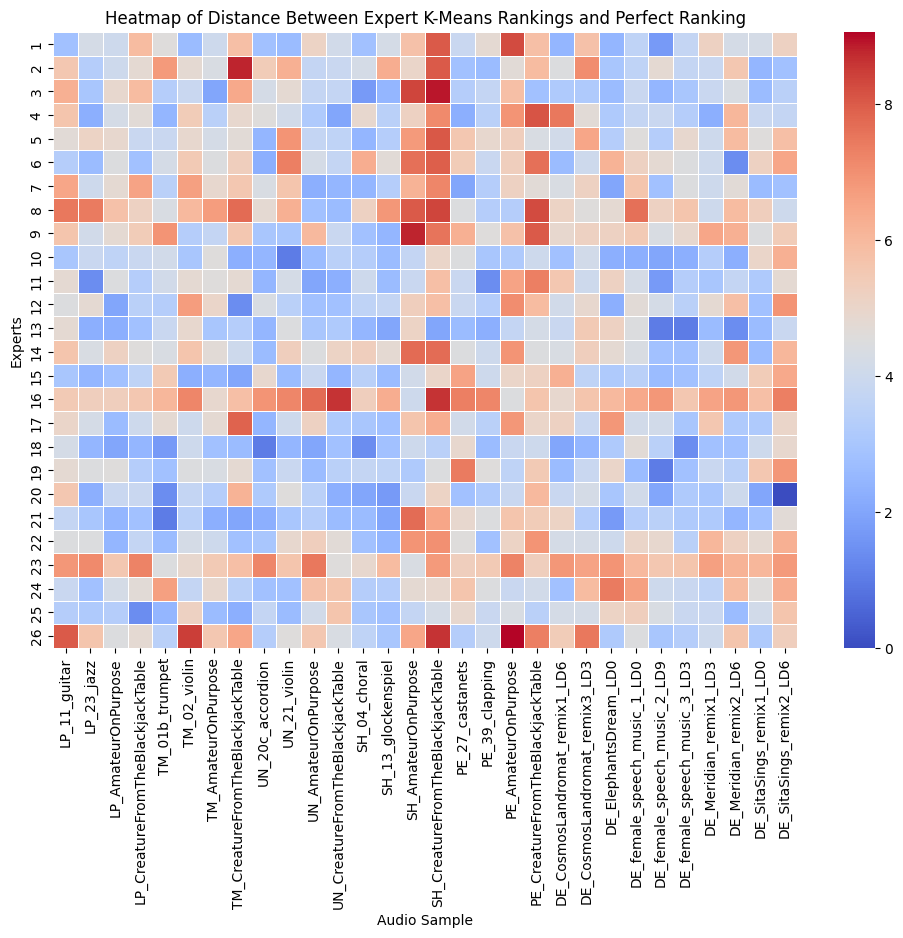

In [272]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix_experts_df, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Audio Sample")
plt.ylabel("Experts")
plt.title("Heatmap of Distance Between Expert K-Means Rankings and Perfect Ranking")

plt.show()

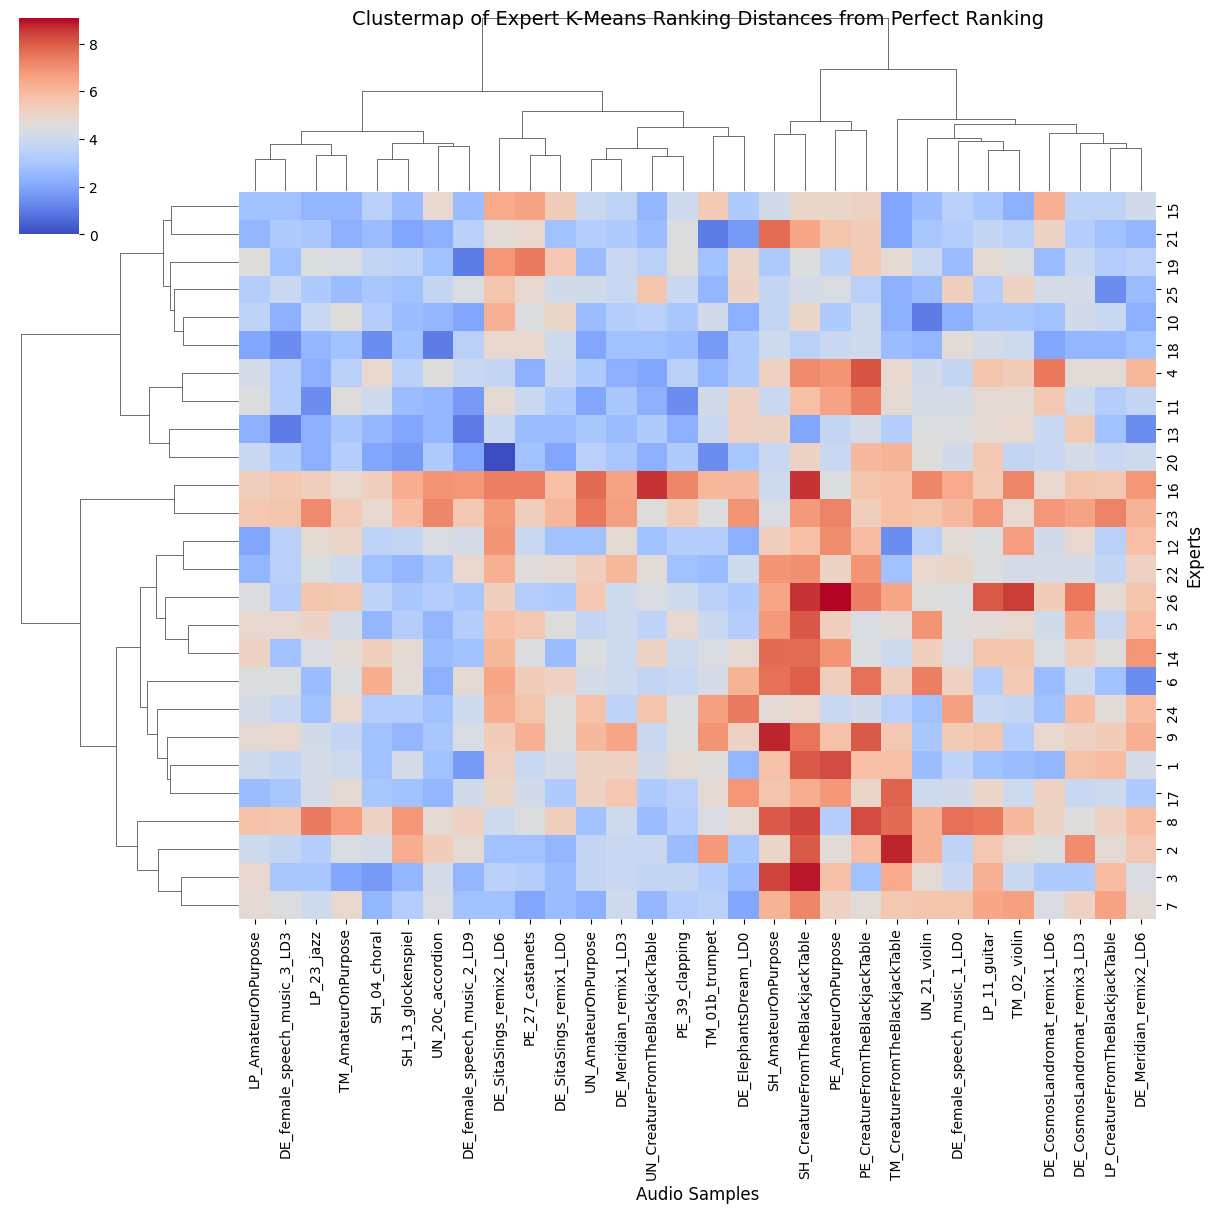

In [273]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix_experts = linkage(distance_matrix_experts, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap_experts = sns.clustermap(
    distance_matrix_experts_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 12),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap_experts.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap_experts.ax_heatmap.set_ylabel("Experts", fontsize=12)
clustermap_experts.ax_heatmap.set_title("Clustermap of Expert K-Means Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Show the plot
plt.show()

In [274]:
# PERFORMANCE-BASED CLUSTERING

# Extract clusters from the linkage matrix
num_clusters = 5  # Choose the number of clusters (you can adjust)
cluster_labels_experts = fcluster(linkage_matrix_experts, num_clusters, criterion='maxclust')

# Create a DataFrame mapping experts to their cluster
cluster_experts_df = pd.DataFrame({'Expert': [f"Expert {i}" for i in range(1, 27)], 
                           'Cluster': cluster_labels_experts})

cluster_experts_df

,Expert,Cluster
0,Expert 1,4
1,Expert 2,5
2,Expert 3,5
3,Expert 4,2
4,Expert 5,4
5,Expert 6,4
6,Expert 7,5
7,Expert 8,5
8,Expert 9,4
9,Expert 10,1


In [275]:
# order cluster_df by Cluster

cluster_experts_df_ordered = cluster_experts_df.sort_values(by='Cluster')

cluster_experts_df_ordered

,Expert,Cluster
20,Expert 21,1
18,Expert 19,1
17,Expert 18,1
9,Expert 10,1
24,Expert 25,1
14,Expert 15,1
12,Expert 13,2
3,Expert 4,2
19,Expert 20,2
10,Expert 11,2


In [276]:
# Example: Find which experts belong to Cluster 1
cluster_1_experts = cluster_experts_df[cluster_experts_df['Cluster'] == 1]
print(cluster_1_experts)

       Expert  Cluster
9   Expert 10        1
14  Expert 15        1
17  Expert 18        1
18  Expert 19        1
20  Expert 21        1
24  Expert 25        1


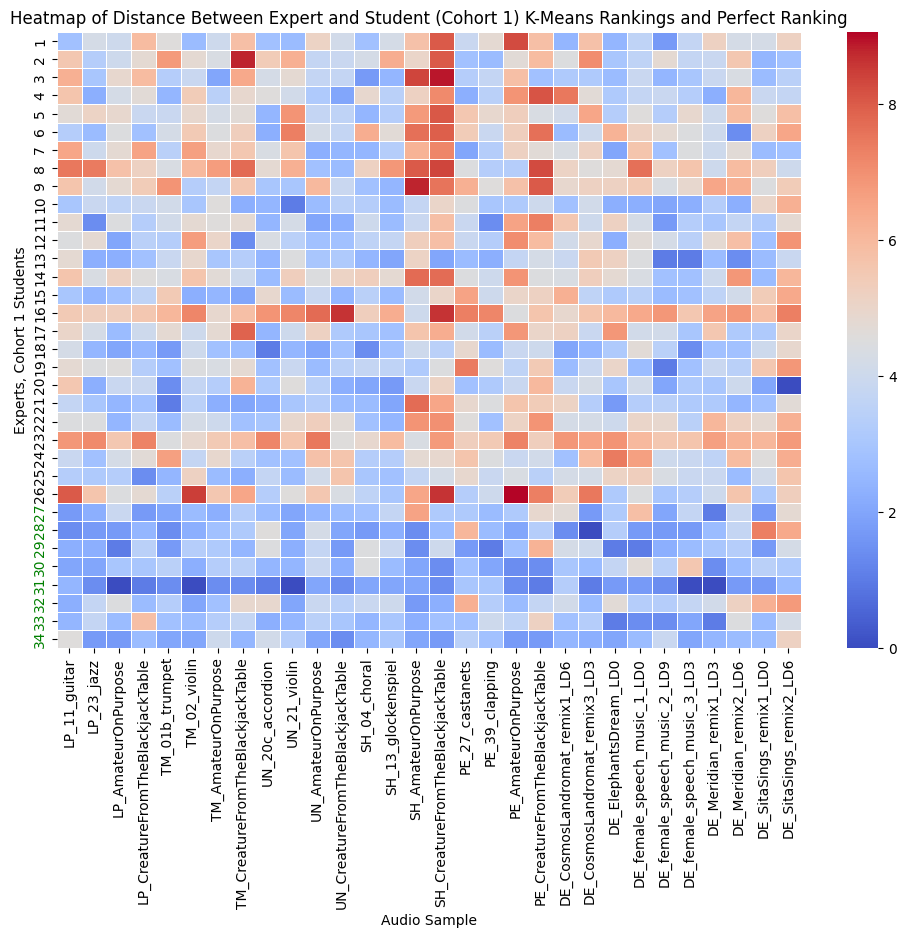

In [277]:
# Create a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(distance_matrix_experts_BSU1_df, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Audio Sample")
plt.ylabel("Experts, Cohort 1 Students")
plt.title("Heatmap of Distance Between Expert and Student (Cohort 1) K-Means Rankings and Perfect Ranking")

for label in ax.get_yticklabels():
    text = label.get_text()
    if text.isdigit() and 27 <= int(text) <= 34:
        label.set_color('green')
    elif text.isdigit() and 35 <= int(text) <= 42:
        label.set_color('orange')


plt.show()

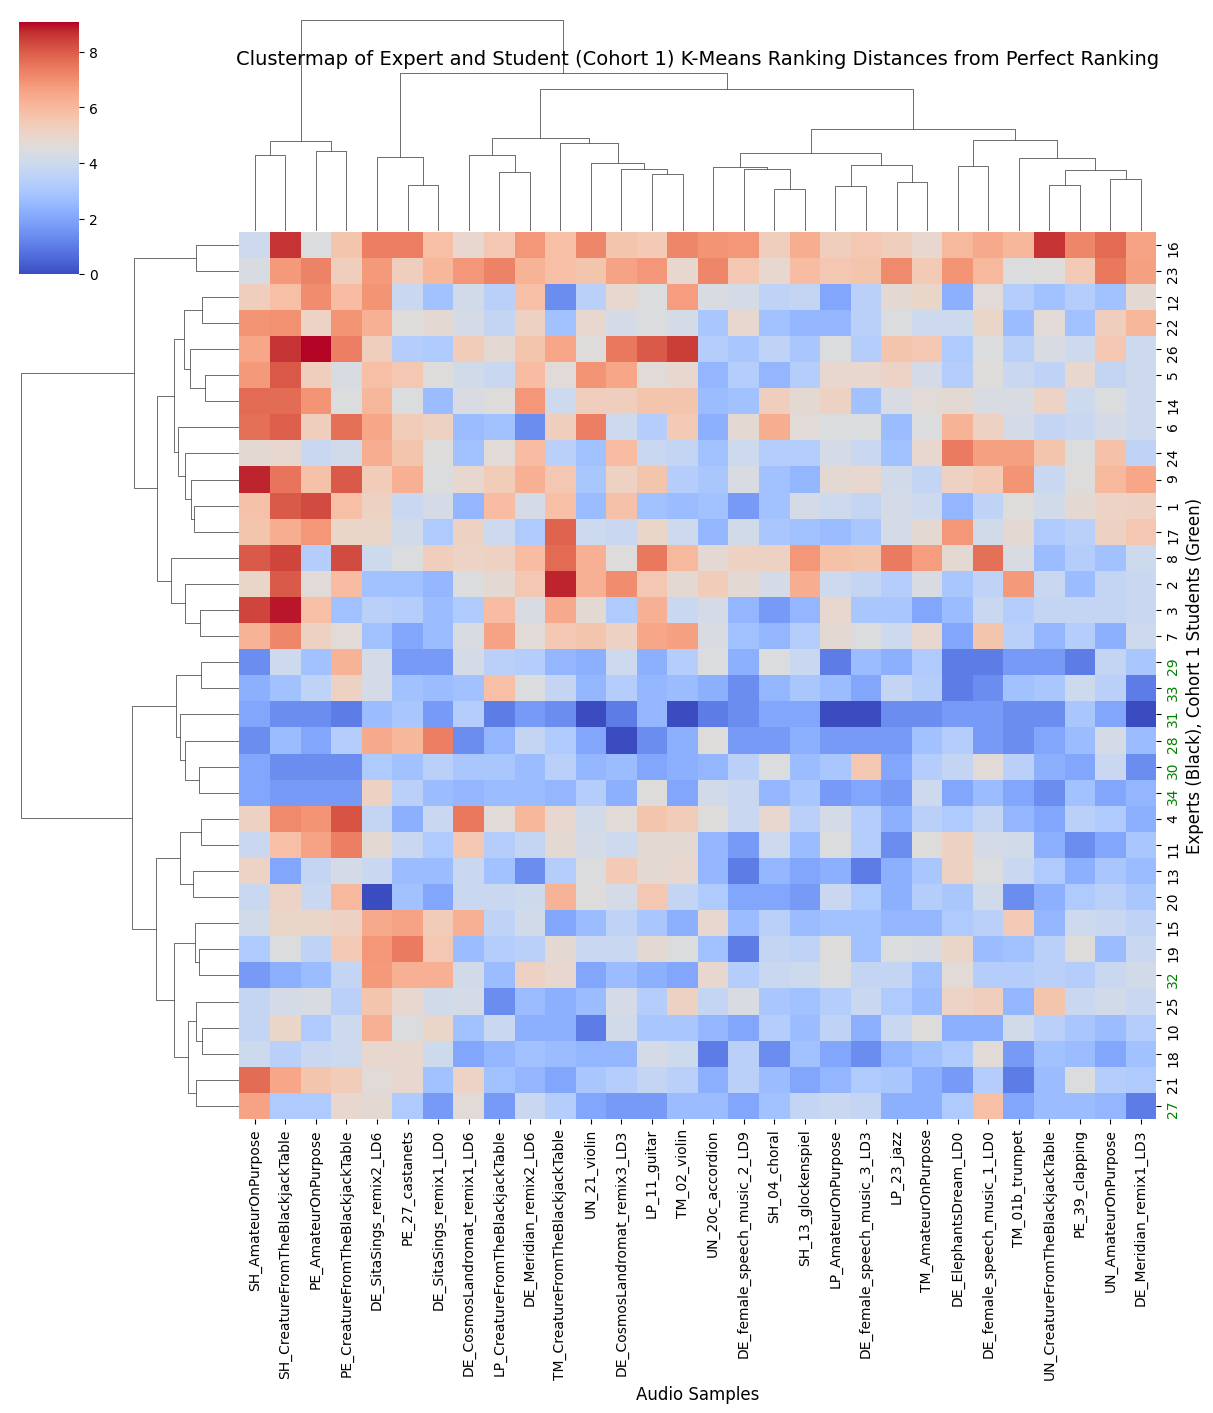

In [278]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix_experts_BSU1 = linkage(distance_matrix_experts_BSU1_df, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap_experts_BSU1 = sns.clustermap(
    distance_matrix_experts_BSU1_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 14),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap_experts_BSU1.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap_experts_BSU1.ax_heatmap.set_ylabel("Experts (Black), Cohort 1 Students (Green)", fontsize=12)
clustermap_experts_BSU1.ax_heatmap.set_title("Clustermap of Expert and Student (Cohort 1) K-Means Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Customize the row tick labels
for label in clustermap_experts_BSU1.ax_heatmap.get_yticklabels():
    text = label.get_text()
    if text.isdigit() and 27 <= int(text) <= 34:
        label.set_color('green')

plt.show()

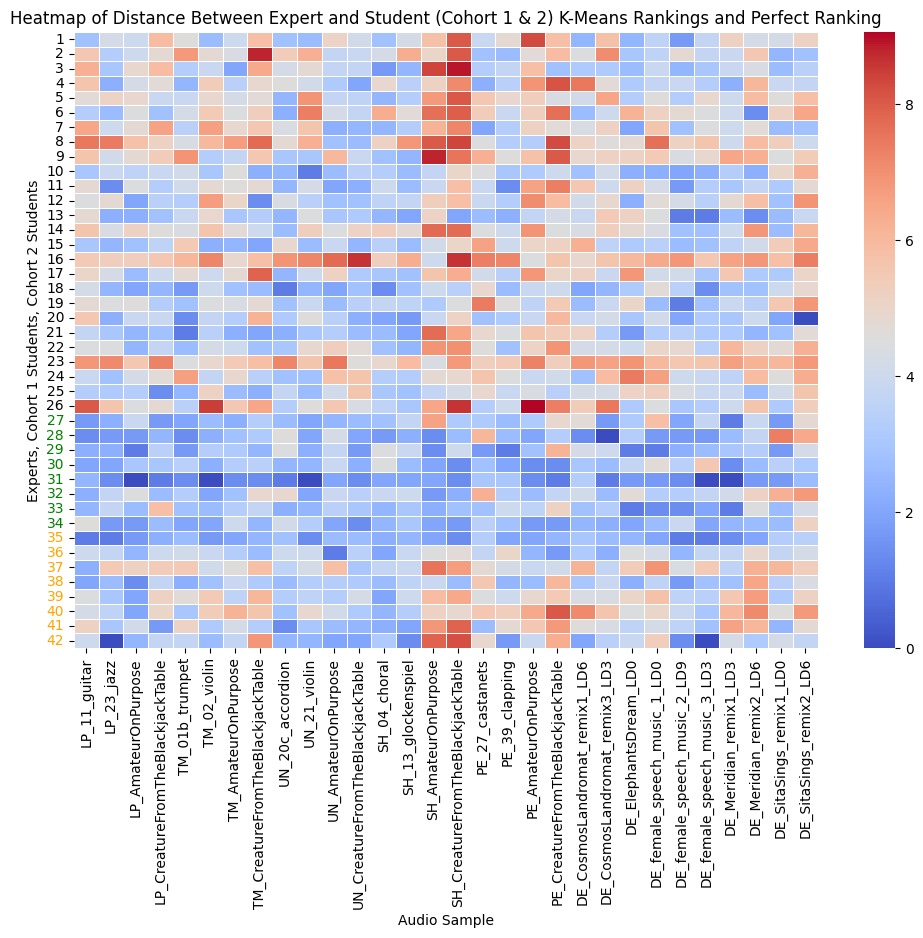

In [279]:
# Create a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(distance_matrix_experts_BSU1_BSU2_df, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Audio Sample")
plt.ylabel("Experts, Cohort 1 Students, Cohort 2 Students")
plt.title("Heatmap of Distance Between Expert and Student (Cohort 1 & 2) K-Means Rankings and Perfect Ranking")

for label in ax.get_yticklabels():
    text = label.get_text()
    if text.isdigit() and 27 <= int(text) <= 34:
        label.set_color('green')
    elif text.isdigit() and 35 <= int(text) <= 42:
        label.set_color('orange')


plt.show()

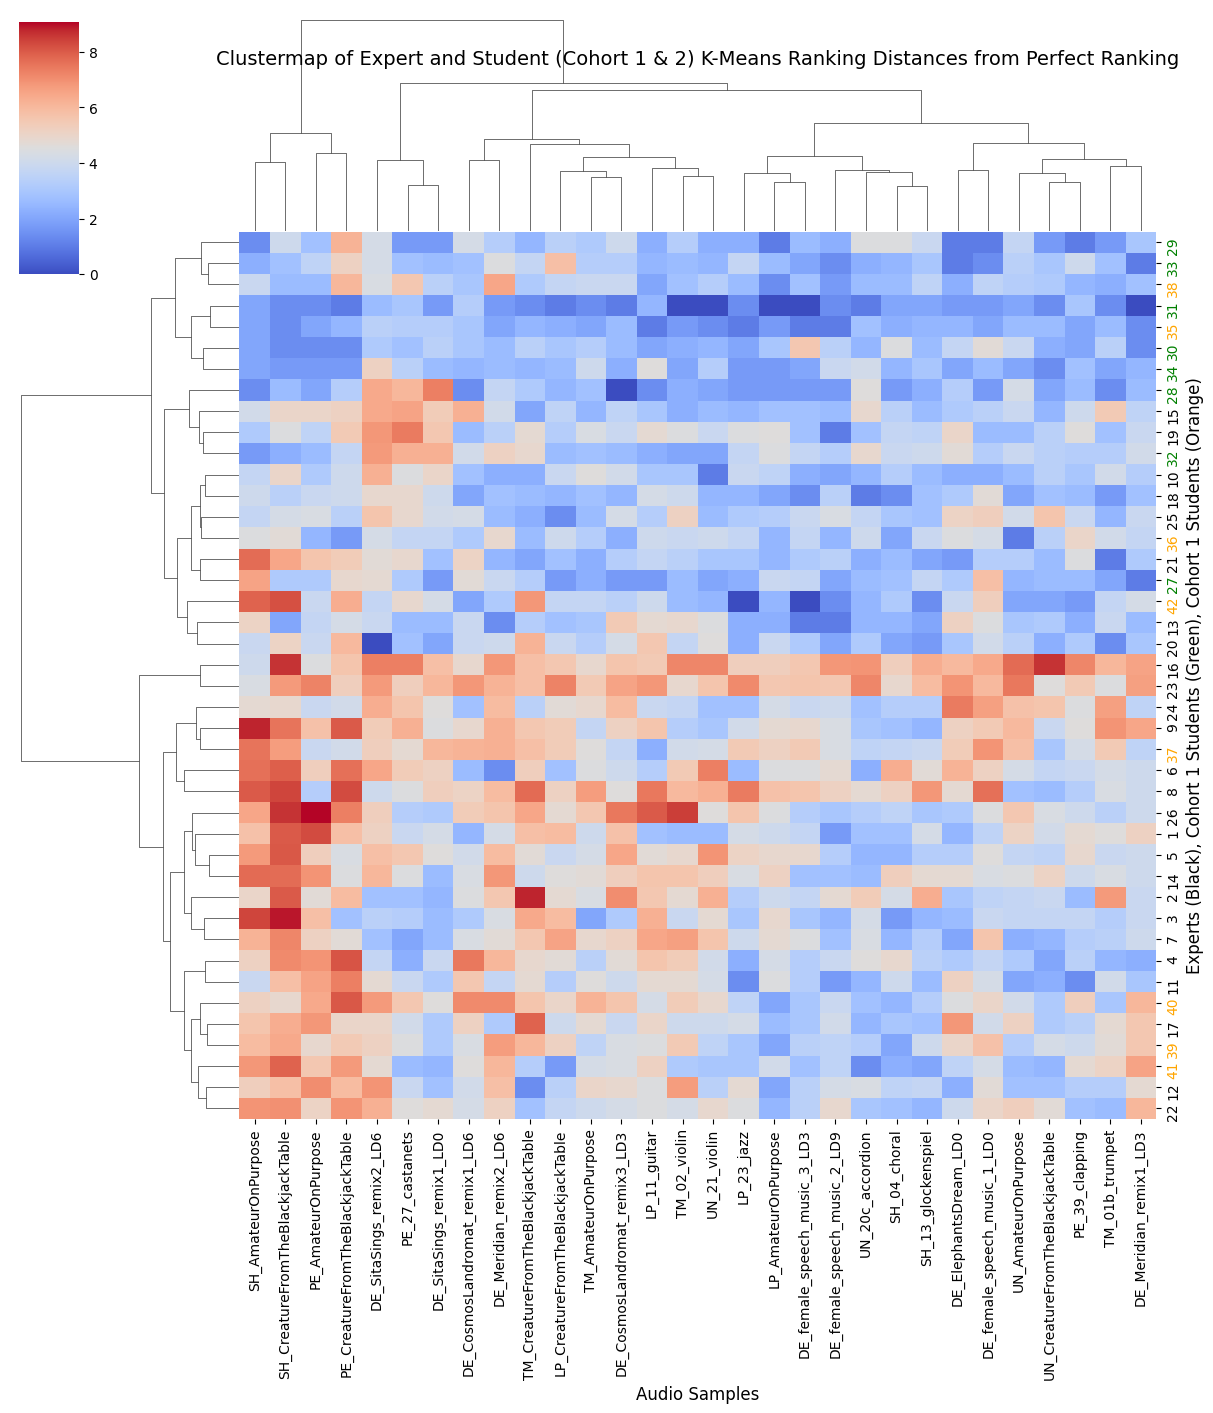

In [280]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix_experts_BSU1_BSU2 = linkage(distance_matrix_experts_BSU1_BSU2_df, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap_experts_BSU1_BSU2 = sns.clustermap(
    distance_matrix_experts_BSU1_BSU2_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 14),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap_experts_BSU1_BSU2.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap_experts_BSU1_BSU2.ax_heatmap.set_ylabel("Experts (Black), Cohort 1 Students (Green), Cohort 1 Students (Orange)", fontsize=12)
clustermap_experts_BSU1_BSU2.ax_heatmap.set_title("Clustermap of Expert and Student (Cohort 1 & 2) K-Means Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Customize the row tick labels
for label in clustermap_experts_BSU1_BSU2.ax_heatmap.get_yticklabels():
    text = label.get_text()
    if text.isdigit() and 27 <= int(text) <= 34:
        label.set_color('green')
    elif text.isdigit() and 35 <= int(text) <= 42:
        label.set_color('orange')

# Show the plot
plt.show()

In [281]:
import pickle as pkl

# export linkage_matrix_experts_BSU1_BSU2 to a pickle file

with open('kmeans_rank_linkage_matrix_experts_BSU1_BSU2.pkl', 'wb') as f:
    pkl.dump(linkage_matrix_experts_BSU1_BSU2, f)
    
# export distance_matrix_experts_BSU1_BSU2_df to a pickle file

with open('kmeans_rank_distance_matrix_experts_BSU1_BSU2_df.pkl', 'wb') as f:
    pkl.dump(distance_matrix_experts_BSU1_BSU2_df, f)

In [282]:
# reversed perfect ranking
reversed_perfect_ranking = np.array([8, 7, 6, 5, 4, 3, 2, 1])

# Create DataFrame for perfect ranking
perfect_df = pd.DataFrame({
    'Sample': ['Perfect Ranking'] * len(conditions),
    'Condition': conditions,
    'Ranking': reversed_perfect_ranking
})


reversed_expert1_rankings_kmeans_based = expert1_rankings_kmeans_based[:, ::-1]
reversed_expert2_rankings_kmeans_based = expert2_rankings_kmeans_based[:, ::-1]
reversed_BSU1_1_rankings_kmeans_based = BSU1_1_rankings_kmeans_based[:, ::-1]
reversed_BSU2_1_rankings_kmeans_based = BSU2_1_rankings_kmeans_based[:, ::-1]

In [283]:
# Spaghetti plot for Expert 1 rankings

# Reshape rankings data for Plotly
expert1_rankings_df = pd.DataFrame(reversed_expert1_rankings_kmeans_based, columns=conditions)
expert1_rankings_df['Sample'] = items

# Melt dataframe for better visualization
expert1_rankings_df_melted = expert1_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

expert1_rankings_df_melted = pd.concat([perfect_df, expert1_rankings_df_melted])

# Create plot
fig = px.line(expert1_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Expert 1 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Show figure
fig.show()

In [284]:
# Spaghetti plot for Expert 2 rankings

# Reshape rankings data for Plotly
expert2_rankings_df = pd.DataFrame(reversed_expert2_rankings_kmeans_based, columns=conditions)
expert2_rankings_df['Sample'] = items

# Melt dataframe for better visualization
expert2_rankings_df_melted = expert2_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

expert2_rankings_df_melted = pd.concat([perfect_df, expert2_rankings_df_melted])

# Create plot
fig = px.line(expert2_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Expert 2 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Show figure
fig.show()

In [285]:
# Spaghetti plot for BSU1_1 rankings

# Reshape rankings data for Plotly
BSU1_1_rankings_df = pd.DataFrame(reversed_BSU1_1_rankings_kmeans_based, columns=conditions)
BSU1_1_rankings_df['Sample'] = items

# Melt dataframe for better visualization
BSU1_1_rankings_df_melted = BSU1_1_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

BSU1_1_rankings_df_melted = pd.concat([perfect_df, BSU1_1_rankings_df_melted])

# Create plot
fig = px.line(BSU1_1_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 1 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Show figure
fig.show()

In [286]:
# Spaghetti plot for BSU2_1 rankings

# Reshape rankings data for Plotly
BSU2_1_rankings_df = pd.DataFrame(reversed_BSU2_1_rankings_kmeans_based, columns=conditions)

BSU2_1_rankings_df['Sample'] = items

# Melt dataframe for better visualization
BSU2_1_rankings_df_melted = BSU2_1_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

BSU2_1_rankings_df_melted = pd.concat([perfect_df, BSU2_1_rankings_df_melted])

# Create plot
fig = px.line(BSU2_1_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 2 Student 1 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Show figure
fig.show()

# Spaghetti Plots Based on Contingency Table Results

In [287]:
print('Experts: ', unique_subjects)
print('BSU1: ', unique_subjects_BSU1)
print('BSU2: ', unique_subjects_BSU2)

Experts:  ['Subject 1: USLA08' 'Subject 2: DEID44' 'Subject 3: DEID1115'
 'Subject 4: DEID337' 'Subject 5: USLA06' 'Subject 6: DEID5'
 'Subject 7: DEID9' 'Subject 8: DEID4' 'Subject 9: USLG04'
 'Subject 10: USLA04' 'Subject 11: USLA07' 'Subject 12: DEID256'
 'Subject 13: DEID6' 'Subject 14: USLG05' 'Subject 15: USLA09'
 'Subject 16: USLG02' 'Subject 17: USLG03' 'Subject 18: DEID7'
 'Subject 19: USLA12' 'Subject 20: DEID10' 'Subject 21: DEID8'
 'Subject 22: DEID2' 'Subject 23: USLA01' 'Subject 24: USLA05'
 'Subject 25: DEID1' 'Subject 26: DEID3']
BSU1:  ['D001' 'D002' 'D003' 'D004' 'D008' 'D009' 'D010' 'D011']
BSU2:  ['D005' 'D013' 'D014' 'D015' 'D016' 'D017' 'D018' 'D019']


In [288]:
good_listeners_index = [10, 28, 29, 30, 31, 32, 33, 34, 35, 38]
good_experts = ['Subject 10: USLA04']
good_students_BSU1 = ['D002', 'D003', 'D004', 'D008', 'D009', 'D010', 'D011']
good_students_BSU2 = ['D005', 'D015']

In [289]:
bad_listeners_index = [16, 23]
bad_experts = ['Subject 16: USLA10', 'Subject 23: USLA17']

In [290]:
easy_easiest_trials_competition_kmeans = ['TM_01b_trumpet', 'DE_ElephantsDream_LD0', 'LP_23_jazz', 'LP_AmateurOnPurpose', 'DE_female_speech_music_2_LD9', 'UN_AmateurOnPurpose', 'UN_CreatureFromTheBlackjackTable']
hard_hardest_trials_competition_kmeans = ['SH_AmateurOnPurpose', 'SH_CreatureFromTheBlackjackTable', 'DE_SitaSings_remix2_LD6', 'PE_27_castanets']

In [291]:
# Helper functions
def get_trial_indices(trial_names, items):
    """Return sorted indices of each trial in items."""
    return sorted([int(np.where(items == trial)[0][0]) for trial in trial_names])

def get_reversed_and_indexed(rankings, trial_indices):
    """Reverse the rankings and index by the given trial indices."""
    return rankings[:, ::-1][trial_indices]

def calculate_cumulative_difference(rankings, perfect_ranking):
    """Calculate the cumulative absolute difference row-wise."""
    return np.abs(rankings - perfect_ranking).sum(axis=1)

def compute_stats(diff_df):
    """Compute mean and sum for each column (excluding the 'Sample' column)."""
    stats = []
    for col in diff_df.columns:
        if col != 'Sample':
            stats.append({
                "Column": col,
                "Mean": diff_df[col].mean(),
                "Sum": diff_df[col].sum()
            })
    return pd.DataFrame(stats)

In [292]:

# Get trial indices for easy and hard trials
east_easiest_trial_indices = get_trial_indices(easy_easiest_trials_competition_kmeans, items)
hard_hardest_trial_indices = get_trial_indices(hard_hardest_trials_competition_kmeans, items)
print("Easiest trials:", east_easiest_trial_indices)
print("Hardest trials:", hard_hardest_trial_indices)

# Define ranking arrays in dictionaries for easier iteration.
# Good listeners (easy and hard trials)
good_listeners_easy = {
    'Expert 10': expert10_rankings_kmeans_based,
    'BSU1_2': BSU1_2_rankings_kmeans_based,
    'BSU1_3': BSU1_3_rankings_kmeans_based,
    'BSU1_4': BSU1_4_rankings_kmeans_based,
    'BSU1_5': BSU1_5_rankings_kmeans_based,
    'BSU1_6': BSU1_6_rankings_kmeans_based,
    'BSU1_7': BSU1_7_rankings_kmeans_based,
    'BSU1_8': BSU1_8_rankings_kmeans_based,
    'BSU2_1': BSU2_1_rankings_kmeans_based,
    'BSU2_4': BSU2_4_rankings_kmeans_based
}
good_listeners_hard = {
    'Expert 10': expert10_rankings_kmeans_based,
    'BSU1_2': BSU1_2_rankings_kmeans_based,
    'BSU1_3': BSU1_3_rankings_kmeans_based,
    'BSU1_4': BSU1_4_rankings_kmeans_based,
    'BSU1_5': BSU1_5_rankings_kmeans_based,
    'BSU1_6': BSU1_6_rankings_kmeans_based,
    'BSU1_7': BSU1_7_rankings_kmeans_based,
    'BSU1_8': BSU1_8_rankings_kmeans_based,
    'BSU2_1': BSU2_1_rankings_kmeans_based,
    'BSU2_4': BSU2_4_rankings_kmeans_based
}

# Bad listeners (easy and hard trials)
bad_listeners_easy = {
    'Expert 16': expert16_rankings_kmeans_based,
    'Expert 23': expert23_rankings_kmeans_based
}
bad_listeners_hard = {
    'Expert 16': expert16_rankings_kmeans_based,
    'Expert 23': expert23_rankings_kmeans_based
}

# Process rankings: reverse and index then compute cumulative differences
def process_rankings(ranking_dict, trial_indices, perfect_ranking):
    cum_diff = {}
    for key, array in ranking_dict.items():
        reversed_array = get_reversed_and_indexed(array, trial_indices)
        cum_diff[key] = calculate_cumulative_difference(reversed_array, perfect_ranking)
    return cum_diff

# Get cumulative differences for each group
cum_diff_good_easy = process_rankings(good_listeners_easy, east_easiest_trial_indices, reversed_perfect_ranking)
cum_diff_bad_easy = process_rankings(bad_listeners_easy, east_easiest_trial_indices, reversed_perfect_ranking)
cum_diff_good_hard = process_rankings(good_listeners_hard, hard_hardest_trial_indices, reversed_perfect_ranking)
cum_diff_bad_hard = process_rankings(bad_listeners_hard, hard_hardest_trial_indices, reversed_perfect_ranking)

# Create DataFrames for each case
def build_df(cum_diff_dict, trial_indices):
    df = pd.DataFrame({'Sample': items[trial_indices]})
    for key, diff in cum_diff_dict.items():
        df[key] = diff
    return df

df_good_easy = build_df(cum_diff_good_easy, east_easiest_trial_indices)
df_bad_easy = build_df(cum_diff_bad_easy, east_easiest_trial_indices)
df_good_hard = build_df(cum_diff_good_hard, hard_hardest_trial_indices)
df_bad_hard = build_df(cum_diff_bad_hard, hard_hardest_trial_indices)

# Compute stats (mean and sum) for each DataFrame
stats_good_easy = compute_stats(df_good_easy)
stats_bad_easy = compute_stats(df_bad_easy)
stats_good_hard = compute_stats(df_good_hard)
stats_bad_hard = compute_stats(df_bad_hard)

Easiest trials: [1, 2, 4, 10, 11, 22, 24]
Hardest trials: [14, 15, 16, 29]


In [293]:
stats_good_easy

,Column,Mean,Sum
0,Expert 10,6.714286,47
1,BSU1_2,4.571429,32
2,BSU1_3,3.714286,26
3,BSU1_4,6.142857,43
4,BSU1_5,2.142857,15
5,BSU1_6,8.428571,59
6,BSU1_7,5.285714,37
7,BSU1_8,3.571429,25
8,BSU2_1,3.714286,26
9,BSU2_4,4.142857,29


In [294]:
stats_bad_easy

,Column,Mean,Sum
0,Expert 16,14.571429,102
1,Expert 23,14.000000,98


In [295]:
stats_good_hard

,Column,Mean,Sum
0,Expert 10,10.00,40
1,BSU1_2,7.75,31
2,BSU1_3,5.25,21
3,BSU1_4,4.50,18
4,BSU1_5,4.00,16
5,BSU1_6,8.75,35
6,BSU1_7,5.25,21
7,BSU1_8,6.00,24
8,BSU2_1,5.25,21
9,BSU2_4,8.00,32


In [296]:
stats_bad_hard

,Column,Mean,Sum
0,Expert 16,16.50,66
1,Expert 23,13.25,53


In [297]:
# Rankings (Good listeners) (Easy trials)
reversed_expert10_rankings_easy_easiest = expert10_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_2_rankings_easy_easiest = BSU1_2_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_3_rankings_easy_easiest = BSU1_3_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_4_rankings_easy_easiest = BSU1_4_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_5_rankings_easy_easiest = BSU1_5_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_6_rankings_easy_easiest = BSU1_6_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_7_rankings_easy_easiest = BSU1_7_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU1_8_rankings_easy_easiest = BSU1_8_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU2_1_rankings_easy_easiest = BSU2_1_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_BSU2_4_rankings_easy_easiest = BSU2_4_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]

# Rankings (Bad listeners) (Easy trials)
reversed_expert16_rankings_easy_easiest = expert16_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]
reversed_expert23_rankings_easy_easiest = expert23_rankings_kmeans_based[:, ::-1][east_easiest_trial_indices]

# Rankings (Good listeners) (Hard trials)
reversed_expert10_rankings_hard_hardest = expert10_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_2_rankings_hard_hardest = BSU1_2_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_3_rankings_hard_hardest = BSU1_3_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_4_rankings_hard_hardest = BSU1_4_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_5_rankings_hard_hardest = BSU1_5_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_6_rankings_hard_hardest = BSU1_6_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_7_rankings_hard_hardest = BSU1_7_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU1_8_rankings_hard_hardest = BSU1_8_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU2_1_rankings_hard_hardest = BSU2_1_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_BSU2_4_rankings_hard_hardest = BSU2_4_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]

# Rankings (Bad listeners) (Hard trials)
reversed_expert16_rankings_hard_hardest = expert16_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]
reversed_expert23_rankings_hard_hardest = expert23_rankings_kmeans_based[:, ::-1][hard_hardest_trial_indices]

## Paper Spaghetti

In [298]:
# Spaghetti plot for Cohort 1 Student 6 rankings

# Reshape rankings data for Plotly
BSU1_6_rankings_df = pd.DataFrame(reversed_BSU1_6_rankings_easy_easiest, columns=conditions)
BSU1_6_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_6_rankings_df_melted = BSU1_6_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_6_rankings_df_melted = pd.concat([perfect_df, BSU1_6_rankings_df_melted])

# Create plot
fig = px.line(BSU1_6_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 6 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [299]:
# Spaghetti plot for Cohort 1 Student 6 rankings

# Reshape rankings data for Plotly
BSU1_6_rankings_df = pd.DataFrame(reversed_BSU1_6_rankings_hard_hardest, columns=conditions)
BSU1_6_rankings_df['Sample'] = items[hard_hardest_trial_indices]

# Melt dataframe for better visualization
BSU1_6_rankings_df_melted = BSU1_6_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_6_rankings_df_melted = pd.concat([perfect_df, BSU1_6_rankings_df_melted])

# Create plot
fig = px.line(BSU1_6_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 6 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Hard/Hardest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [300]:
# Spaghetti plot for Expert 16 rankings

# Reshape rankings data for Plotly
expert16_rankings_df = pd.DataFrame(reversed_expert16_rankings_easy_easiest, columns=conditions)
expert16_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
expert16_rankings_df_melted = expert16_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

expert16_rankings_df_melted = pd.concat([perfect_df, expert16_rankings_df_melted])

# Create plot
fig = px.line(expert16_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Expert 16 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [301]:
# Spaghetti plot for Expert 16 rankings

# Reshape rankings data for Plotly
expert16_rankings_df = pd.DataFrame(reversed_expert16_rankings_hard_hardest, columns=conditions)
expert16_rankings_df['Sample'] = items[hard_hardest_trial_indices]

# Melt dataframe for better visualization
expert16_rankings_df_melted = expert16_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

expert16_rankings_df_melted = pd.concat([perfect_df, expert16_rankings_df_melted])

# Create plot
fig = px.line(expert16_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Expert 16 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Hard/Hardest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [302]:
# Spaghetti plot for Expert 10 rankings

# Reshape rankings data for Plotly
expert10_rankings_df = pd.DataFrame(reversed_expert10_rankings_easy_easiest, columns=conditions)
expert10_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
expert10_rankings_df_melted = expert10_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

expert10_rankings_df_melted = pd.concat([perfect_df, expert10_rankings_df_melted])

# Create plot
fig = px.line(expert10_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Expert 10 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [303]:
# Spaghetti plot for Cohort 1 Student 2 rankings

# Reshape rankings data for Plotly
BSU1_2_rankings_df = pd.DataFrame(reversed_BSU1_2_rankings_easy_easiest, columns=conditions)
BSU1_2_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_2_rankings_df_melted = BSU1_2_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')

BSU1_2_rankings_df_melted = pd.concat([perfect_df, BSU1_2_rankings_df_melted])

# Create plot
fig = px.line(BSU1_2_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 2 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [304]:
# Spaghetti plot for Cohort 1 Student 3 rankings

# Reshape rankings data for Plotly
BSU1_3_rankings_df = pd.DataFrame(reversed_BSU1_3_rankings_easy_easiest, columns=conditions)
BSU1_3_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_3_rankings_df_melted = BSU1_3_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_3_rankings_df_melted = pd.concat([perfect_df, BSU1_3_rankings_df_melted])

# Create plot
fig = px.line(BSU1_3_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 3 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [305]:
# Spaghetti plot for Cohort 1 Student 4 rankings

# Reshape rankings data for Plotly
BSU1_4_rankings_df = pd.DataFrame(reversed_BSU1_4_rankings_easy_easiest, columns=conditions)
BSU1_4_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_4_rankings_df_melted = BSU1_4_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_4_rankings_df_melted = pd.concat([perfect_df, BSU1_4_rankings_df_melted])

# Create plot
fig = px.line(BSU1_4_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 4 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [306]:
# Spaghetti plot for Cohort 1 Student 5 rankings

# Reshape rankings data for Plotly
BSU1_5_rankings_df = pd.DataFrame(reversed_BSU1_5_rankings_easy_easiest, columns=conditions)
BSU1_5_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_5_rankings_df_melted = BSU1_5_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_5_rankings_df_melted = pd.concat([perfect_df, BSU1_5_rankings_df_melted])

# Create plot
fig = px.line(BSU1_5_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 5 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [307]:
# Spaghetti plot for Cohort 1 Student 6 rankings

# Reshape rankings data for Plotly
BSU1_6_rankings_df = pd.DataFrame(reversed_BSU1_6_rankings_easy_easiest, columns=conditions)
BSU1_6_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_6_rankings_df_melted = BSU1_6_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_6_rankings_df_melted = pd.concat([perfect_df, BSU1_6_rankings_df_melted])

# Create plot
fig = px.line(BSU1_6_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 6 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [308]:
# Spaghetti plot for Cohort 1 Student 7 rankings

# Reshape rankings data for Plotly
BSU1_7_rankings_df = pd.DataFrame(reversed_BSU1_7_rankings_easy_easiest, columns=conditions)
BSU1_7_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_7_rankings_df_melted = BSU1_7_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_7_rankings_df_melted = pd.concat([perfect_df, BSU1_7_rankings_df_melted])

# Create plot
fig = px.line(BSU1_7_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 7 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [309]:
# Spaghetti plot for Cohort 1 Student 8 rankings

# Reshape rankings data for Plotly
BSU1_8_rankings_df = pd.DataFrame(reversed_BSU1_8_rankings_easy_easiest, columns=conditions)
BSU1_8_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU1_8_rankings_df_melted = BSU1_8_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU1_8_rankings_df_melted = pd.concat([perfect_df, BSU1_8_rankings_df_melted])

# Create plot
fig = px.line(BSU1_8_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 1 Student 8 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [310]:
# Spaghetti plot for Cohort 2 Student 1 rankings

# Reshape rankings data for Plotly
BSU2_1_rankings_df = pd.DataFrame(reversed_BSU2_1_rankings_easy_easiest, columns=conditions)
BSU2_1_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU2_1_rankings_df_melted = BSU2_1_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU2_1_rankings_df_melted = pd.concat([perfect_df, BSU2_1_rankings_df_melted])

# Create plot
fig = px.line(BSU2_1_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 2 Student 1 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()

In [311]:
# Spaghetti plot for Cohort 2 Student 4 rankings

# Reshape rankings data for Plotly
BSU2_4_rankings_df = pd.DataFrame(reversed_BSU2_4_rankings_easy_easiest, columns=conditions)
BSU2_4_rankings_df['Sample'] = items[east_easiest_trial_indices]

# Melt dataframe for better visualization
BSU2_4_rankings_df_melted = BSU2_4_rankings_df.melt(id_vars=['Sample'], var_name='Condition', value_name='Ranking')
BSU2_4_rankings_df_melted = pd.concat([perfect_df, BSU2_4_rankings_df_melted])

# Create plot
fig = px.line(BSU2_4_rankings_df_melted, x='Condition', y='Ranking', color='Sample', markers=True,
              title="Cohort 2 Student 4 (K-Means) Rankings per Condition with Perfect Ranking Reference",
              labels={"Ranking": "Ranking (Lower is Better)", "Condition": "Conditions (Low to High Quality)"},
              template="plotly_white")

# Adjust figure dimensions
fig.update_layout(width=1000, height=800)

# Invert y-axis (lower ranks at top)
fig.update_yaxes(autorange="reversed")

# Modify the "Perfect Ranking" line to be more visible
fig.update_traces(
    selector=dict(name="Perfect Ranking"),
    line=dict(width=10, color='black'),
    marker=dict(size=14, color='black')
)

# Add subtitle
fig.update_layout(
    annotations=[
        dict(
            text="Easy/Easiest Trials Based on Hierarchical Clustering",
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Show figure
fig.show()